In [19]:
from keras.layers import Dense, Dropout, Input
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist

In [20]:
# Load data and flatten images
(X_train, _), (X_test, _) = mnist.load_data()
X_train = np.concatenate((X_train, X_test))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')
X_train = (X_train - 127.5) / 127.5

X_train.shape

(70000, 784)

In [21]:
# Declare fews variables
randomDim = 100
lr = .0002
beta = .5
adam = Adam(learning_rate=lr, beta_1=beta)

In [22]:
def create_generator():
    # Generator
    _generator = Sequential()
    _generator.add(Dense(256, input_dim=randomDim, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.02)))
    _generator.add(LeakyReLU(0.2))
    _generator.add(Dense(512))
    _generator.add(LeakyReLU(0.2))
    _generator.add(Dense(1024))
    _generator.add(LeakyReLU(0.2))
    _generator.add(Dense(784, activation='tanh'))
    _generator.compile(loss='binary_crossentropy', optimizer=adam)
    return _generator

In [23]:
def create_discriminator():
    # Discriminator
    _discriminator = Sequential()
    _discriminator.add(Dense(1024, input_dim=784, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.02)))
    _discriminator.add(LeakyReLU(0.2))
    _discriminator.add(Dropout(0.3))
    _discriminator.add(Dense(512))
    _discriminator.add(LeakyReLU(0.2))
    _discriminator.add(Dropout(0.3))
    _discriminator.add(Dense(256))
    _discriminator.add(LeakyReLU(0.2))
    _discriminator.add(Dropout(0.3))
    _discriminator.add(Dense(1, activation='sigmoid'))
    _discriminator.compile(loss='binary_crossentropy', optimizer=adam)
    return _discriminator

In [24]:
def create_gan():
    # GAN
    discriminator.trainable=False
    ganInput = Input(shape=(randomDim,))
    x = generator(ganInput)
    ganOutput = discriminator(x)
    gan = Model(inputs=ganInput, outputs=ganOutput)
    gan.compile(loss='binary_crossentropy', optimizer=adam)
    return gan

In [25]:
generator = create_generator()
discriminator = create_discriminator()
gan = create_gan()

In [26]:
dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('data/single/images//gan_loss_epoch_%d.png' % epoch)

In [27]:
# Create a wall of generated MNIST images
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('data/single/images/gan_generated_image_epoch_%d.png' % epoch)

In [28]:
def train(epochs=1, batchSize=128):
    batchCount = X_train.shape[0] / batchSize
    print('Epochs:', epochs)
    print( 'Batch size:', batchSize)
    print( 'Batches per epoch:', batchCount)

    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(int(batchCount)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            # print np.shape(imageBatch), np.shape(generatedImages)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 20 == 0:
            plotGeneratedImages(e)
            #saveModels(e)

    # Plot losses from every epoch
    plotLoss(e)

Epochs: 200
Batch size: 128
Batches per epoch: 546.875
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
--------------- Epoch 11 ---------------
--------------- Epoch 12 ---------------
--------------- Epoch 13 ---------------
--------------- Epoch 14 ---------------
--------------- Epoch 15 ---------------
--------------- Epoch 16 ---------------
--------------- Epoch 17 ---------------
--------------- Epoch 18 ---------------
--------------- Epoch 19 ---------------
--------------- Epoch 20 ---------------
--------------- Epoch 21 ---------------
--------------- Epoch 22 ---------------
--------------- Epoch 23 ---------------
-----------

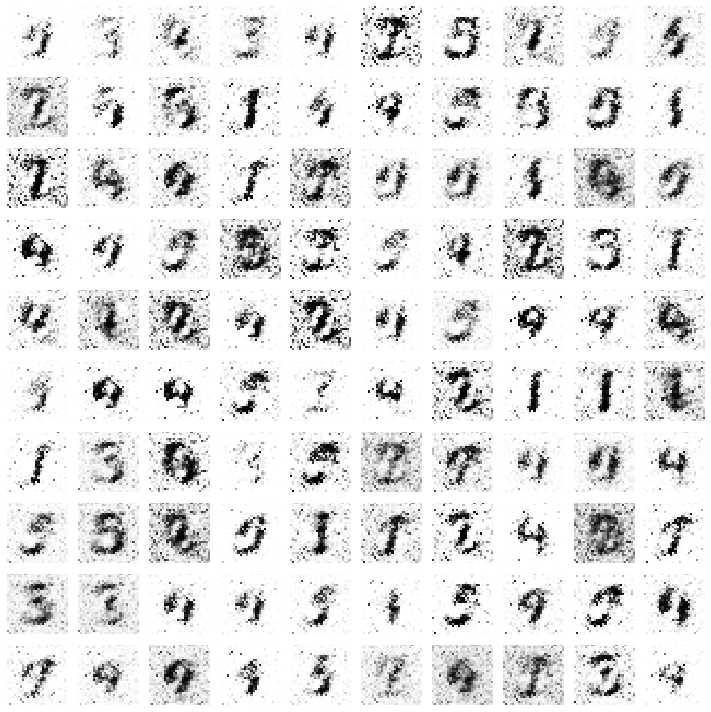

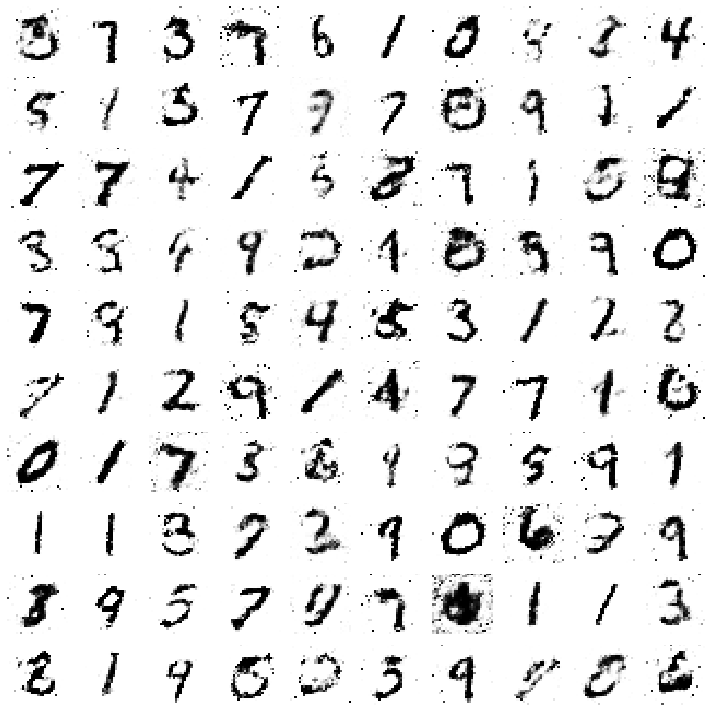

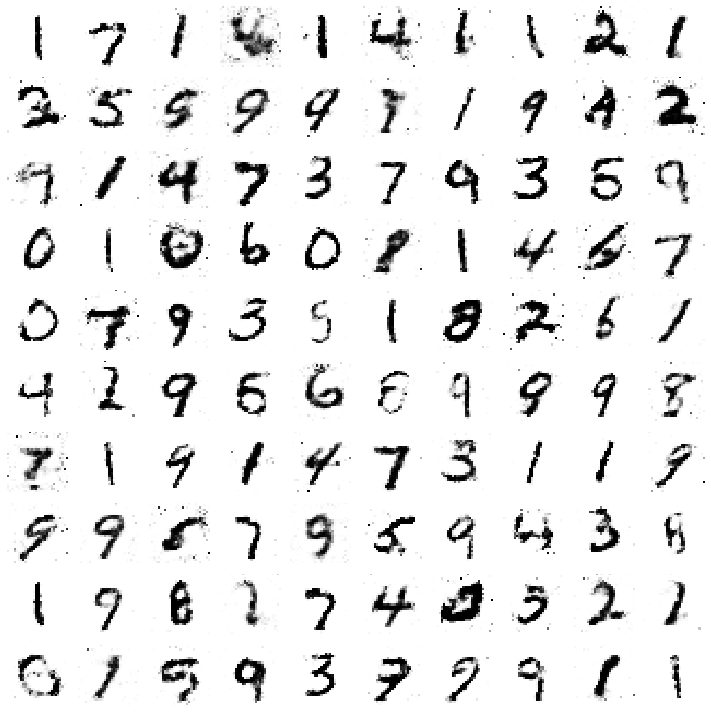

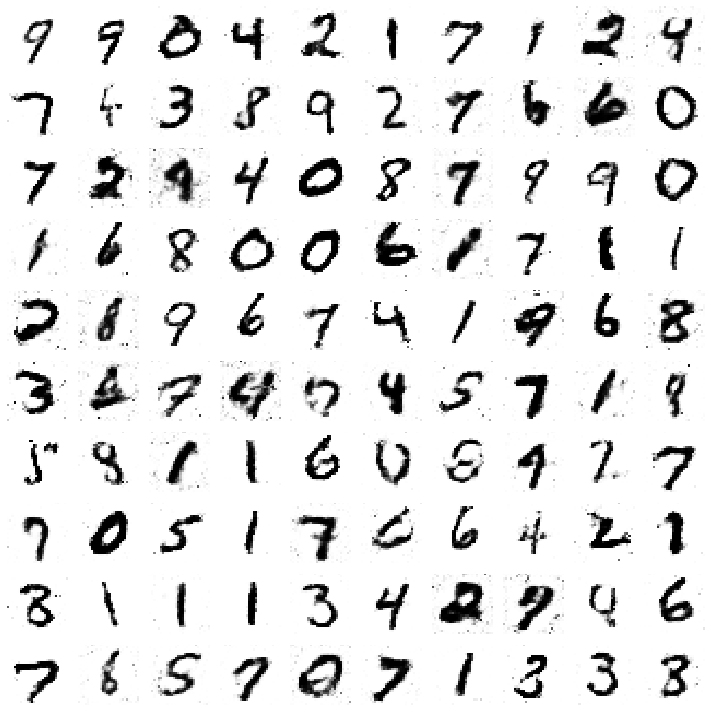

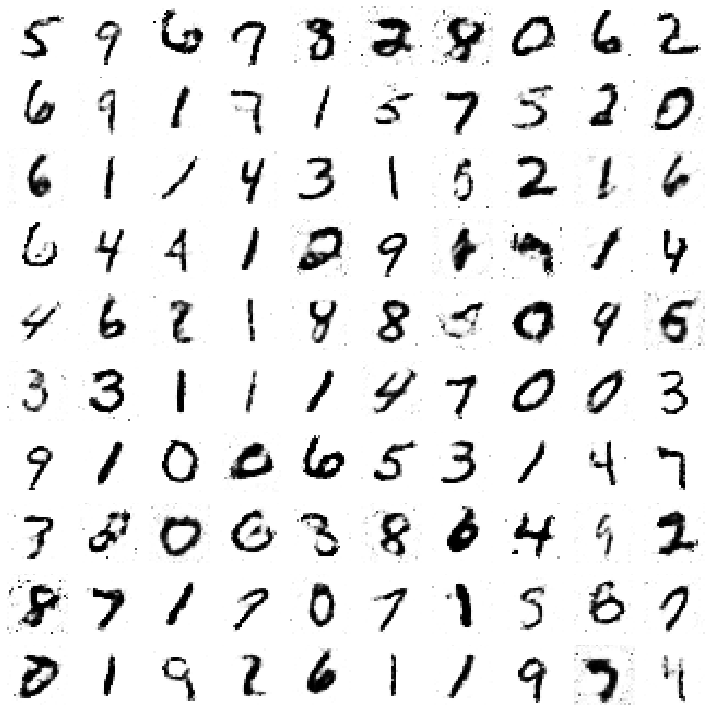

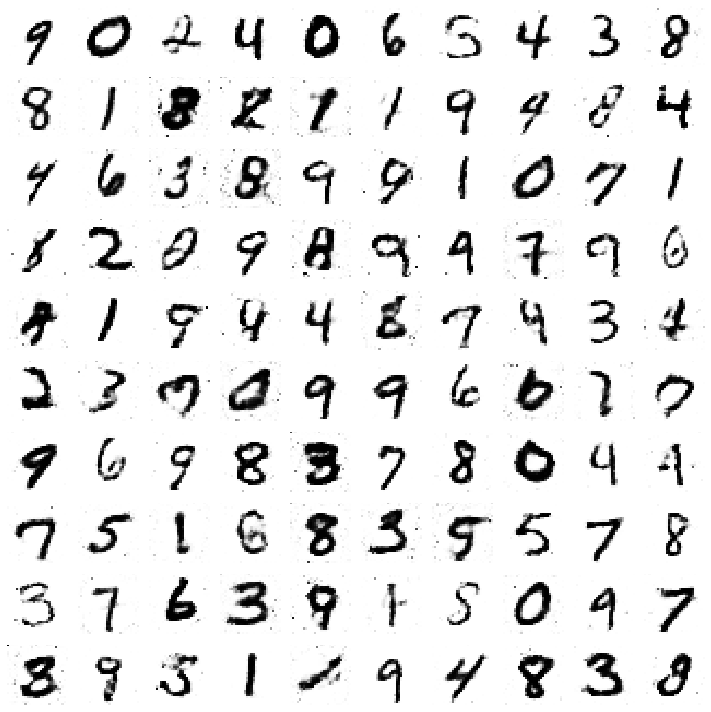

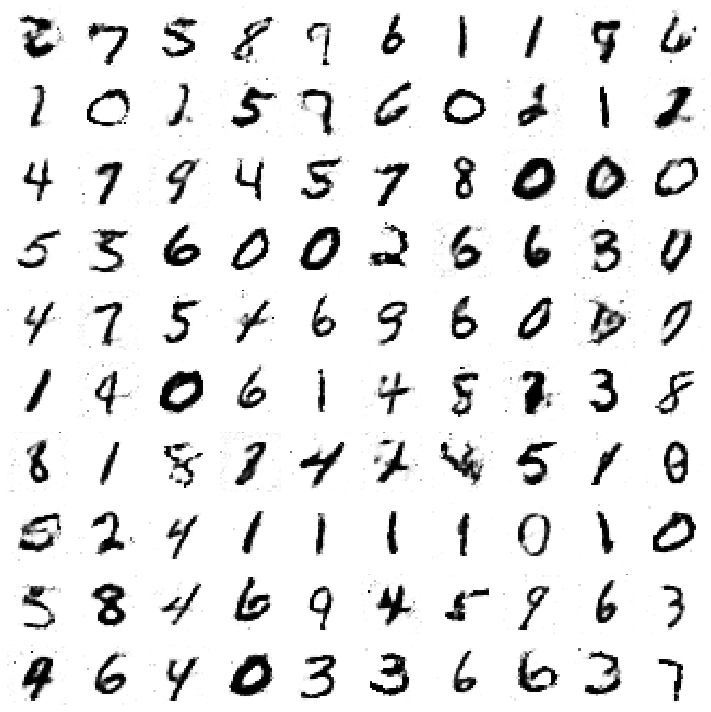

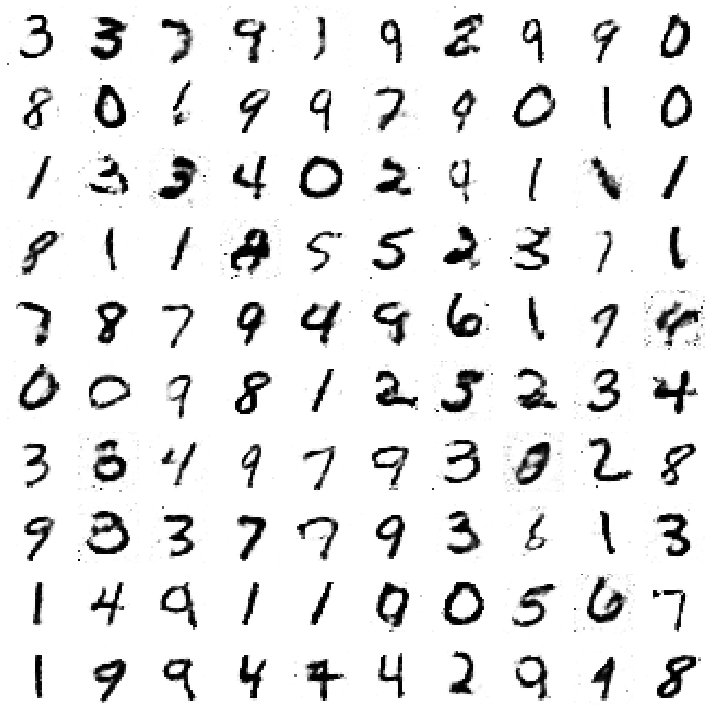

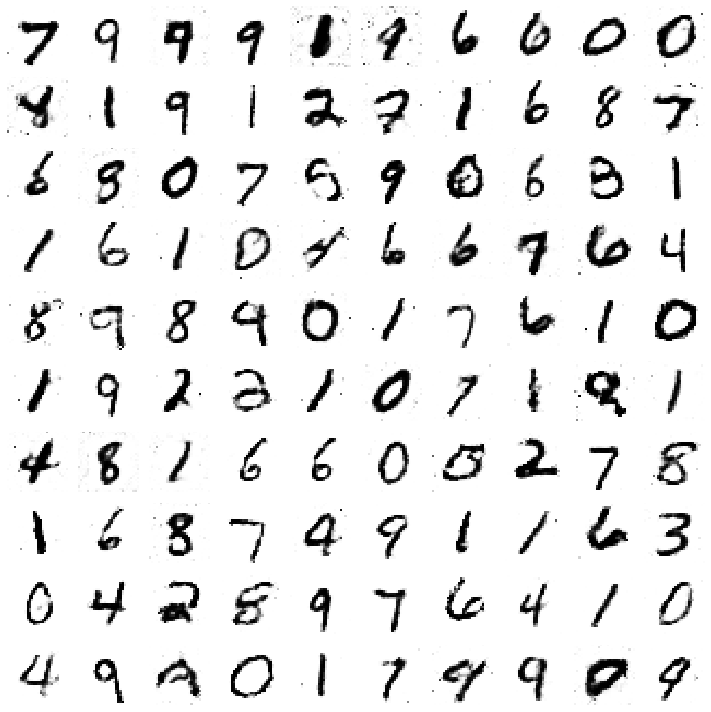

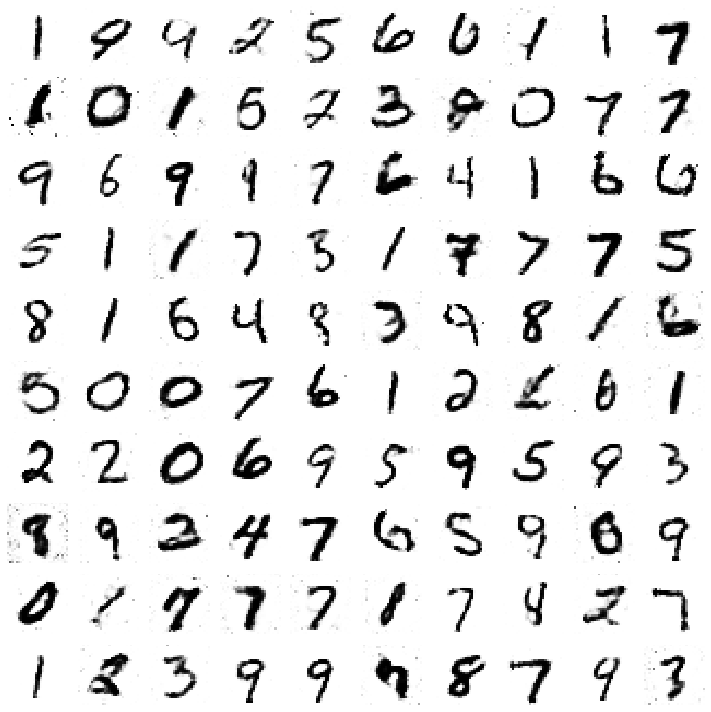

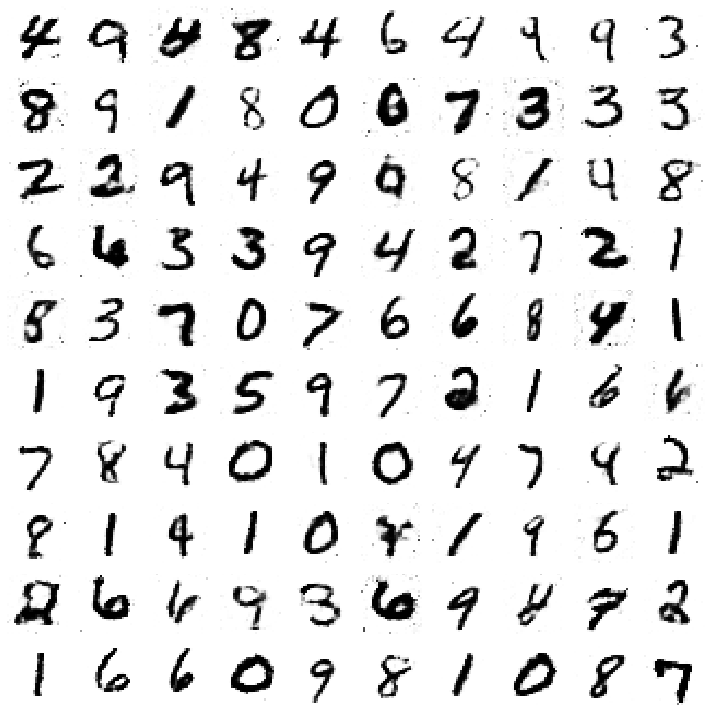

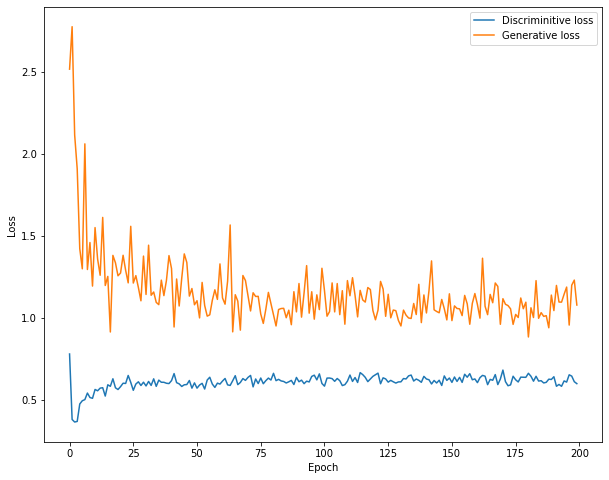

In [29]:
train(200, 128)